## Importando as bibliotecas e os dados

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dados = pd.read_csv('base_NBB.csv')
dados2 = pd.read_csv('Classificao.csv')

## Entendendo o conteúdo

In [3]:
dados.head()

,Jogador,Equipe,DD_TOTAL,TD_TOTAL,DD_PORJOGO,TD_PORJOGO,EF_TOTAL,EF_PORJOGO,ET_TOTAL,VI_TOTAL,...,2P_TOTAL,LL_TOTAL,JO_PORJOGO,Min_PORJOGO,Pts_PORJOGO,3P_PORJOGO,2P_PORJOGO,LL_PORJOGO,Temporada,MVP
0,Georginho,Sesi Franca,12,2,0.41,0.07,689,23.76,78,6,...,238,126,29,33.80,16.28,3.72,8.21,4.34,2021-22,0.0
1,Caboclo,São Paulo,10,0,0.36,0.00,556,19.86,59,8,...,230,77,28,32.92,16.86,5.89,8.21,2.75,2021-22,1.0
2,Miller,123 Minas,8,0,0.25,0.00,496,15.50,53,13,...,282,68,32,23.95,11.03,0.09,8.81,2.13,2021-22,0.0
3,Mãozinha,Fortaleza B. C.,7,0,0.35,0.00,400,20.00,23,4,...,182,22,20,33.54,13.50,3.30,9.10,1.10,2021-22,0.0
4,Dikembe,Pinheiros,7,0,0.33,0.00,309,14.71,34,5,...,196,38,21,26.38,11.14,0.00,9.33,1.81,2021-22,0.0


In [4]:
dados.drop(['DD_PORJOGO', 'TD_PORJOGO', 'EF_PORJOGO', 'ET_PORJOGO',
       'VI_PORJOGO', 'TO_PORJOGO',
       'FC_PORJOGO', 'T/FC_PORJOGO', 'BR_PORJOGO',
       'B/E_PORJOGO', 'PTS_PORJOGO', '3PC_PORJOGO', '3PT_PORJOGO',
       '3P%_PORJOGO', '2PC_PORJOGO', '2PT_PORJOGO', '2P%_PORJOGO',
       'LLC_PORJOGO', 'LLT_PORJOGO', 'LL%_PORJOGO', 'EN_PORJOGO', 'AS_PORJOGO', 'ER_PORJOGO', 'IA%_PORJOGO','RT_PORJOGO', 'RO_PORJOGO',
       'RD_PORJOGO', 'JO_PORJOGO', 'Min_PORJOGO', 'Pts_PORJOGO',
       '3P_PORJOGO', '2P_PORJOGO', 'LL_PORJOGO'], axis=1, inplace=True)

In [5]:
dados2.head()

,Classificação;Equipe;AP(%);Temporada
0,1;Flamengo;92.9;2008-09
1,2;Brasília;78.6;2008-09
2,3;123 Minas;75.0;2008-09
3,4;Joinville;75.0;2008-09
4,5;Limeira;64.3;2008-09


É preciso organizar as colunas dessa tabela de classificação

In [6]:
classificacao = dados2["Classificação;Equipe;AP(%);Temporada"].str.split(";", n=4, expand=True)
dados2["Classificação"] = classificacao[0]
dados2["Equipe"] = classificacao[1]
dados2["AP(%)"] = classificacao[2]
dados2["Temporada"] = classificacao[3]

In [7]:
classificacao.columns = ['Classificacao', 'Equipe', 'AP(%)','Temporada']

### A soma das equipes

In [8]:
soma_equipes = dados.groupby('Equipe').sum()
soma_equipes

,DD_TOTAL,TD_TOTAL,EF_TOTAL,ET_TOTAL,VI_TOTAL,TO_TOTAL,FC_TOTAL,T/FC_TOTAL,BR_TOTAL,B/E_TOTAL,...,RT_TOTAL,RO_TOTAL,RD_TOTAL,JO_TOTAL,Min_TOTAL,Pts_TOTAL,3P_TOTAL,2P_TOTAL,LL_TOTAL,MVP
Equipe,,,,,,,,,,,,,,,,,,,,,
0,0,0,21,5,2,0,10,0,5,1,...,12,5,7,4,0,32,3,24,5,0.0
123 Minas,147,0,34644,5498,922,988,8283,14,2853,124,...,12808,3561,9247,4022,81270,31948,10614,16544,6017,0.0
Araraquara,31,0,8614,1603,208,290,2281,4,827,37,...,3023,804,2219,1062,22097,8377,2415,4436,1526,0.0
Assis,17,0,6143,1016,163,222,1674,4,543,23,...,2445,707,1738,731,16407,6165,1806,3068,1291,0.0
BRB/Brasília,41,0,8340,1609,195,219,2126,7,649,30,...,3632,938,2694,1075,22149,8370,2754,4002,1614,0.0
Bauru,147,4,37035,4798,792,780,7693,12,2864,126,...,13165,3479,9686,3903,81797,33678,12651,16152,5961,1.0
Botafogo,16,0,6174,1060,151,171,1795,2,546,29,...,2494,691,1803,780,15958,5953,2013,2876,1064,0.0
Brasília,105,0,25697,3437,553,749,5466,10,1871,79,...,8675,2261,6414,2595,52459,22670,8064,11180,4272,1.0
Caxias do Sul Basquete,27,0,10173,1861,333,253,2954,3,1002,39,...,4186,1089,3097,1324,28053,10201,3126,5132,1943,0.0


In [9]:
#retirando uma linha com dados errados
soma_equipes.drop(["0"], inplace=True)

### Qual equipe fez mais pontos?

In [10]:
equipes_por_pontos = soma_equipes.sort_values(by='Pts_TOTAL', ascending=False)
equipes_por_pontos = equipes_por_pontos.reset_index()
equipes_por_pontos.loc[0:5, ['Equipe', 'Pts_TOTAL']]

,Equipe,Pts_TOTAL
0,Flamengo,35403
1,Bauru,33678
2,Sesi Franca,33318
3,Pinheiros,33180
4,Paulistano,32539
5,123 Minas,31948


### Qual equipe cometeu mais erros?

In [11]:
equipes_por_erros = soma_equipes.sort_values(by='ET_TOTAL', ascending=False)
equipes_por_erros = equipes_por_erros.reset_index()
equipes_por_erros.loc[0:5, ['Equipe', 'ET_TOTAL']]

,Equipe,ET_TOTAL
0,123 Minas,5498
1,Paulistano,5453
2,Pinheiros,5272
3,Sesi Franca,5249
4,Flamengo,4891
5,Bauru,4798


### Qual equipe jogou mais partidas?

In [12]:
numero_partidas = soma_equipes.sort_values(by='JO_TOTAL', ascending=False)
numero_partidas = numero_partidas.reset_index()
numero_partidas.loc[0:5, ['Equipe', 'JO_TOTAL']]

,Equipe,JO_TOTAL
0,Paulistano,4318
1,Flamengo,4031
2,123 Minas,4022
3,Pinheiros,3949
4,Bauru,3903
5,Sesi Franca,3901


### Quais equipes possuem mais jogadores com triplos duplos?

In [13]:
equipes_triploduplo = soma_equipes.sort_values(by='TD_TOTAL', ascending=False)
equipes_triploduplo = equipes_triploduplo.reset_index()
equipes_triploduplo.loc[0:6, ['Equipe', 'TD_TOTAL']]

,Equipe,TD_TOTAL
0,São Paulo,10
1,Bauru,4
2,Paulistano,2
3,Sesi Franca,2
4,São José,1
5,Uberlândia,1
6,Mogi,1


### Quais jogadores acumularam mais pontos em todas as temporadas?

In [14]:
jogadores = dados.groupby('Jogador', as_index=False).sum()
jogadores

,Jogador,DD_TOTAL,TD_TOTAL,EF_TOTAL,ET_TOTAL,VI_TOTAL,TO_TOTAL,FC_TOTAL,T/FC_TOTAL,BR_TOTAL,...,RT_TOTAL,RO_TOTAL,RD_TOTAL,JO_TOTAL,Min_TOTAL,Pts_TOTAL,3P_TOTAL,2P_TOTAL,LL_TOTAL,MVP
0,#,1,0,76,15,3,0,34,2,12,...,47,18,29,20,225,66,36,46,11,0.0
1,A. Bambu,5,0,1674,259,37,60,490,0,119,...,774,235,539,220,4620,1509,579,768,246,0.0
2,A. Williams,1,0,343,58,0,14,52,0,45,...,111,40,71,27,746,353,105,194,54,0.0
3,Abner,0,0,308,53,7,7,141,0,22,...,190,75,115,96,774,210,114,174,36,0.0
4,Addai,0,0,183,34,10,1,47,0,22,...,54,13,41,26,492,156,18,86,52,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
807,Zezinho,0,0,500,184,21,5,193,0,92,...,179,42,137,91,1893,480,138,210,132,0.0
808,Ziggy,0,0,12,3,0,0,8,0,2,...,9,2,7,11,44,9,6,2,1,0.0
809,Zion,0,0,17,1,0,0,16,1,0,...,18,9,9,9,74,15,9,6,0,0.0
810,Zubiaurre,0,0,80,25,2,3,31,0,8,...,28,5,23,24,286,82,33,44,5,0.0


In [15]:
jogadores_ordenados = jogadores.sort_values(by='PTS_TOTAL', ignore_index=True, ascending=False)
jogadores_ordenados

,Jogador,DD_TOTAL,TD_TOTAL,EF_TOTAL,ET_TOTAL,VI_TOTAL,TO_TOTAL,FC_TOTAL,T/FC_TOTAL,BR_TOTAL,...,RT_TOTAL,RO_TOTAL,RD_TOTAL,JO_TOTAL,Min_TOTAL,Pts_TOTAL,3P_TOTAL,2P_TOTAL,LL_TOTAL,MVP
0,Alex,18,0,8853,1219,155,234,1844,1,744,...,2836,654,2182,762,20243,8635,3456,3720,1672,1.0
1,Jefferson,42,0,6855,1166,164,191,1231,0,650,...,2631,580,2051,647,15502,6838,3360,2768,1136,0.0
2,Shamell,5,0,6385,891,119,42,764,0,501,...,1458,272,1186,380,12261,6805,2814,2812,1329,0.0
3,Marquinhos,7,0,6092,716,83,74,630,0,360,...,1519,208,1311,348,10436,6203,2409,2540,1488,3.0
4,Arthur,8,0,6112,799,142,128,1536,1,396,...,2056,529,1527,641,13963,6173,2049,3138,1100,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
807,Botelho,0,0,-1,1,0,0,1,0,0,...,0,0,0,1,4,0,0,0,0,0.0
808,Dimi,0,0,0,0,0,0,0,1,0,...,0,0,0,1,1,0,0,0,0,0.0
809,Vitor Hugo,0,0,0,0,0,0,0,1,0,...,0,0,0,1,1,0,0,0,0,0.0
810,Thales,0,0,0,0,0,0,1,0,0,...,0,0,0,4,2,0,0,0,0,0.0


In [16]:
jogadores_mais_pontos = jogadores_ordenados.loc[:4, ['Jogador','PTS_TOTAL']]
jogadores_mais_pontos

,Jogador,PTS_TOTAL
0,Alex,8635
1,Jefferson,6838
2,Shamell,6805
3,Marquinhos,6203
4,Arthur,6173


<BarContainer object of 5 artists>

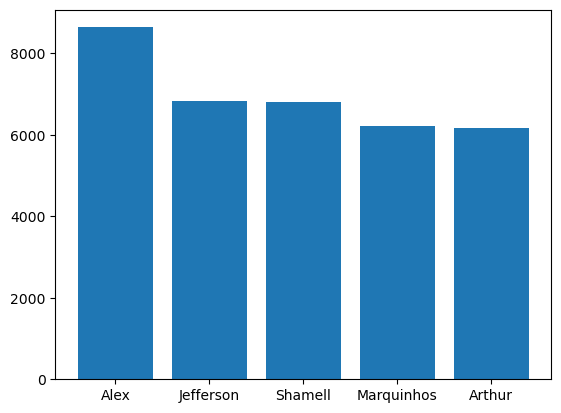

In [17]:
plt.bar('Jogador', 'PTS_TOTAL', data=jogadores_mais_pontos)

## Analisando a correlação entre as variáveis

In [18]:
equipes = dados.groupby('Equipe').mean()
equipes

,DD_TOTAL,TD_TOTAL,EF_TOTAL,ET_TOTAL,VI_TOTAL,TO_TOTAL,FC_TOTAL,T/FC_TOTAL,BR_TOTAL,B/E_TOTAL,...,RT_TOTAL,RO_TOTAL,RD_TOTAL,JO_TOTAL,Min_TOTAL,Pts_TOTAL,3P_TOTAL,2P_TOTAL,LL_TOTAL,MVP
Equipe,,,,,,,,,,,,,,,,,,,,,
0,0.000000,0.000000,21.000000,5.000000,2.000000,0.000000,10.000000,0.000000,5.000000,1.000000,...,12.000000,5.000000,7.000000,4.000000,0.000000,32.000000,3.000000,24.000000,5.000000,0.000000
123 Minas,0.724138,0.000000,170.660099,27.083744,4.541872,4.866995,40.802956,0.068966,14.054187,0.610837,...,63.093596,17.541872,45.551724,19.812808,400.344828,157.379310,52.285714,81.497537,29.640394,0.000000
Araraquara,0.543860,0.000000,151.122807,28.122807,3.649123,5.087719,40.017544,0.070175,14.508772,0.649123,...,53.035088,14.105263,38.929825,18.631579,387.666667,146.964912,42.368421,77.824561,26.771930,0.000000
Assis,0.435897,0.000000,157.512821,26.051282,4.179487,5.692308,42.923077,0.102564,13.923077,0.589744,...,62.692308,18.128205,44.564103,18.743590,420.692308,158.076923,46.307692,78.666667,33.102564,0.000000
BRB/Brasília,0.694915,0.000000,141.355932,27.271186,3.305085,3.711864,36.033898,0.118644,11.000000,0.508475,...,61.559322,15.898305,45.661017,18.220339,375.406780,141.864407,46.677966,67.830508,27.355932,0.000000
Bauru,0.727723,0.019802,183.341584,23.752475,3.920792,3.861386,38.084158,0.059406,14.178218,0.623762,...,65.173267,17.222772,47.950495,19.321782,404.935644,166.722772,62.628713,79.960396,29.509901,0.004950
Botafogo,0.390244,0.000000,150.585366,25.853659,3.682927,4.170732,43.780488,0.048780,13.317073,0.707317,...,60.829268,16.853659,43.975610,19.024390,389.219512,145.195122,49.097561,70.146341,25.951220,0.000000
Brasília,0.777778,0.000000,190.348148,25.459259,4.096296,5.548148,40.488889,0.074074,13.859259,0.585185,...,64.259259,16.748148,47.511111,19.222222,388.585185,167.925926,59.733333,82.814815,31.644444,0.007407
Caxias do Sul Basquete,0.415385,0.000000,156.507692,28.630769,5.123077,3.892308,45.446154,0.046154,15.415385,0.600000,...,64.400000,16.753846,47.646154,20.369231,431.584615,156.938462,48.092308,78.953846,29.892308,0.000000


In [19]:
equipes.drop(["0"], inplace=True)

In [20]:
classificacao['AP(%)'] = classificacao['AP(%)'].astype(float)
classificacao

,Classificacao,Equipe,AP(%),Temporada
0,1,Flamengo,92.9,2008-09
1,2,Brasília,78.6,2008-09
2,3,123 Minas,75.0,2008-09
3,4,Joinville,75.0,2008-09
4,5,Limeira,64.3,2008-09
...,...,...,...,...
214,13,Mogi,34.4,2021-22
215,14,Fortaleza B. C.,31.3,2021-22
216,15,Cerrado Basquete,31.3,2021-22
217,16,Luvix/União Corinthians,25.0,2021-22


In [26]:
classificacao_para_correlacao = classificacao.drop(['Classificacao', 'Temporada'], axis=1)

In [27]:
classificacao_para_correlacao = classificacao_para_correlacao.groupby('Equipe').mean()

In [28]:
dados_para_correlacao = pd.merge(equipes, classificacao_para_correlacao, how = 'inner', on = 'Equipe')
dados_para_correlacao

,DD_TOTAL,TD_TOTAL,EF_TOTAL,ET_TOTAL,VI_TOTAL,TO_TOTAL,FC_TOTAL,T/FC_TOTAL,BR_TOTAL,B/E_TOTAL,...,RO_TOTAL,RD_TOTAL,JO_TOTAL,Min_TOTAL,Pts_TOTAL,3P_TOTAL,2P_TOTAL,LL_TOTAL,MVP,AP(%)
Equipe,,,,,,,,,,,,,,,,,,,,,
123 Minas,0.724138,0.000000,170.660099,27.083744,4.541872,4.866995,40.802956,0.068966,14.054187,0.610837,...,17.541872,45.551724,19.812808,400.344828,157.379310,52.285714,81.497537,29.640394,0.000000,53.171429
Araraquara,0.543860,0.000000,151.122807,28.122807,3.649123,5.087719,40.017544,0.070175,14.508772,0.649123,...,14.105263,38.929825,18.631579,387.666667,146.964912,42.368421,77.824561,26.771930,0.000000,26.575000
Assis,0.435897,0.000000,157.512821,26.051282,4.179487,5.692308,42.923077,0.102564,13.923077,0.589744,...,18.128205,44.564103,18.743590,420.692308,158.076923,46.307692,78.666667,33.102564,0.000000,31.966667
BRB/Brasília,0.694915,0.000000,141.355932,27.271186,3.305085,3.711864,36.033898,0.118644,11.000000,0.508475,...,15.898305,45.661017,18.220339,375.406780,141.864407,46.677966,67.830508,27.355932,0.000000,26.975000
Bauru,0.727723,0.019802,183.341584,23.752475,3.920792,3.861386,38.084158,0.059406,14.178218,0.623762,...,17.222772,47.950495,19.321782,404.935644,166.722772,62.628713,79.960396,29.509901,0.004950,61.150000
Botafogo,0.390244,0.000000,150.585366,25.853659,3.682927,4.170732,43.780488,0.048780,13.317073,0.707317,...,16.853659,43.975610,19.024390,389.219512,145.195122,49.097561,70.146341,25.951220,0.000000,40.400000
Brasília,0.777778,0.000000,190.348148,25.459259,4.096296,5.548148,40.488889,0.074074,13.859259,0.585185,...,16.748148,47.511111,19.222222,388.585185,167.925926,59.733333,82.814815,31.644444,0.007407,68.900000
Caxias do Sul Basquete,0.415385,0.000000,156.507692,28.630769,5.123077,3.892308,45.446154,0.046154,15.415385,0.600000,...,16.753846,47.646154,20.369231,431.584615,156.938462,48.092308,78.953846,29.892308,0.000000,34.920000
Cerrado Basquete,0.821429,0.000000,174.250000,27.678571,3.857143,5.892857,40.714286,0.142857,14.964286,0.571429,...,22.035714,55.928571,22.107143,452.785714,168.678571,54.964286,87.357143,26.357143,0.000000,27.300000


In [29]:
correlation = dados_para_correlacao.corr()
correlation

,DD_TOTAL,TD_TOTAL,EF_TOTAL,ET_TOTAL,VI_TOTAL,TO_TOTAL,FC_TOTAL,T/FC_TOTAL,BR_TOTAL,B/E_TOTAL,...,RO_TOTAL,RD_TOTAL,JO_TOTAL,Min_TOTAL,Pts_TOTAL,3P_TOTAL,2P_TOTAL,LL_TOTAL,MVP,AP(%)
DD_TOTAL,1.000000,0.668782,0.551414,-0.239034,-0.266944,0.570226,-0.273623,0.378663,-0.090754,0.150764,...,0.021297,0.473384,-0.106187,0.051931,0.367370,0.165201,0.236570,0.077010,0.705014,0.660153
TD_TOTAL,0.668782,1.000000,0.442994,-0.080878,-0.160082,0.390096,-0.108088,0.089673,0.060150,0.194692,...,-0.023715,0.415689,0.036950,0.195521,0.373933,0.229971,0.219308,0.143568,0.931754,0.367696
EF_TOTAL,0.551414,0.442994,1.000000,0.267864,0.143245,0.550320,0.454083,-0.094257,0.370497,0.113833,...,0.309768,0.843459,0.595035,0.695517,0.937229,0.589975,0.817926,0.650833,0.533719,0.665877
ET_TOTAL,-0.239034,-0.080878,0.267864,1.000000,0.550398,0.058726,0.716368,-0.224101,0.611939,-0.553837,...,0.624261,0.312093,0.610920,0.723654,0.521086,0.552920,0.628969,0.549849,-0.116223,-0.309302
VI_TOTAL,-0.266944,-0.160082,0.143245,0.550398,1.000000,0.016057,0.378769,-0.218969,0.138615,-0.512537,...,0.219609,0.074287,0.292891,0.281593,0.216859,0.445952,0.271183,0.392057,-0.195669,-0.111876
TO_TOTAL,0.570226,0.390096,0.550320,0.058726,0.016057,1.000000,0.089989,0.142614,0.190145,0.016812,...,0.214656,0.490109,0.124843,0.294882,0.478349,0.325062,0.389534,0.142489,0.399124,0.441153
FC_TOTAL,-0.273623,-0.108088,0.454083,0.716368,0.378769,0.089989,1.000000,-0.493545,0.686279,-0.016705,...,0.527552,0.497964,0.826267,0.865208,0.679267,0.288727,0.746489,0.681607,-0.122138,-0.175382
T/FC_TOTAL,0.378663,0.089673,-0.094257,-0.224101,-0.218969,0.142614,-0.493545,1.000000,-0.445930,-0.150339,...,-0.115813,-0.232514,-0.552634,-0.343370,-0.186375,-0.087470,-0.243242,-0.127556,0.084163,0.112589
BR_TOTAL,-0.090754,0.060150,0.370497,0.611939,0.138615,0.190145,0.686279,-0.445930,1.000000,0.028889,...,0.621005,0.469138,0.683292,0.737419,0.581007,0.330423,0.694708,0.365672,0.057697,-0.087697
B/E_TOTAL,0.150764,0.194692,0.113833,-0.553837,-0.512537,0.016812,-0.016705,-0.150339,0.028889,1.000000,...,-0.263429,0.065709,-0.026262,-0.077978,0.022599,-0.424393,0.017162,-0.058755,0.223608,0.222927


Não é simples analisar essa tabela, por isso construi um heatmap que permite uma visualização melhor da correlação

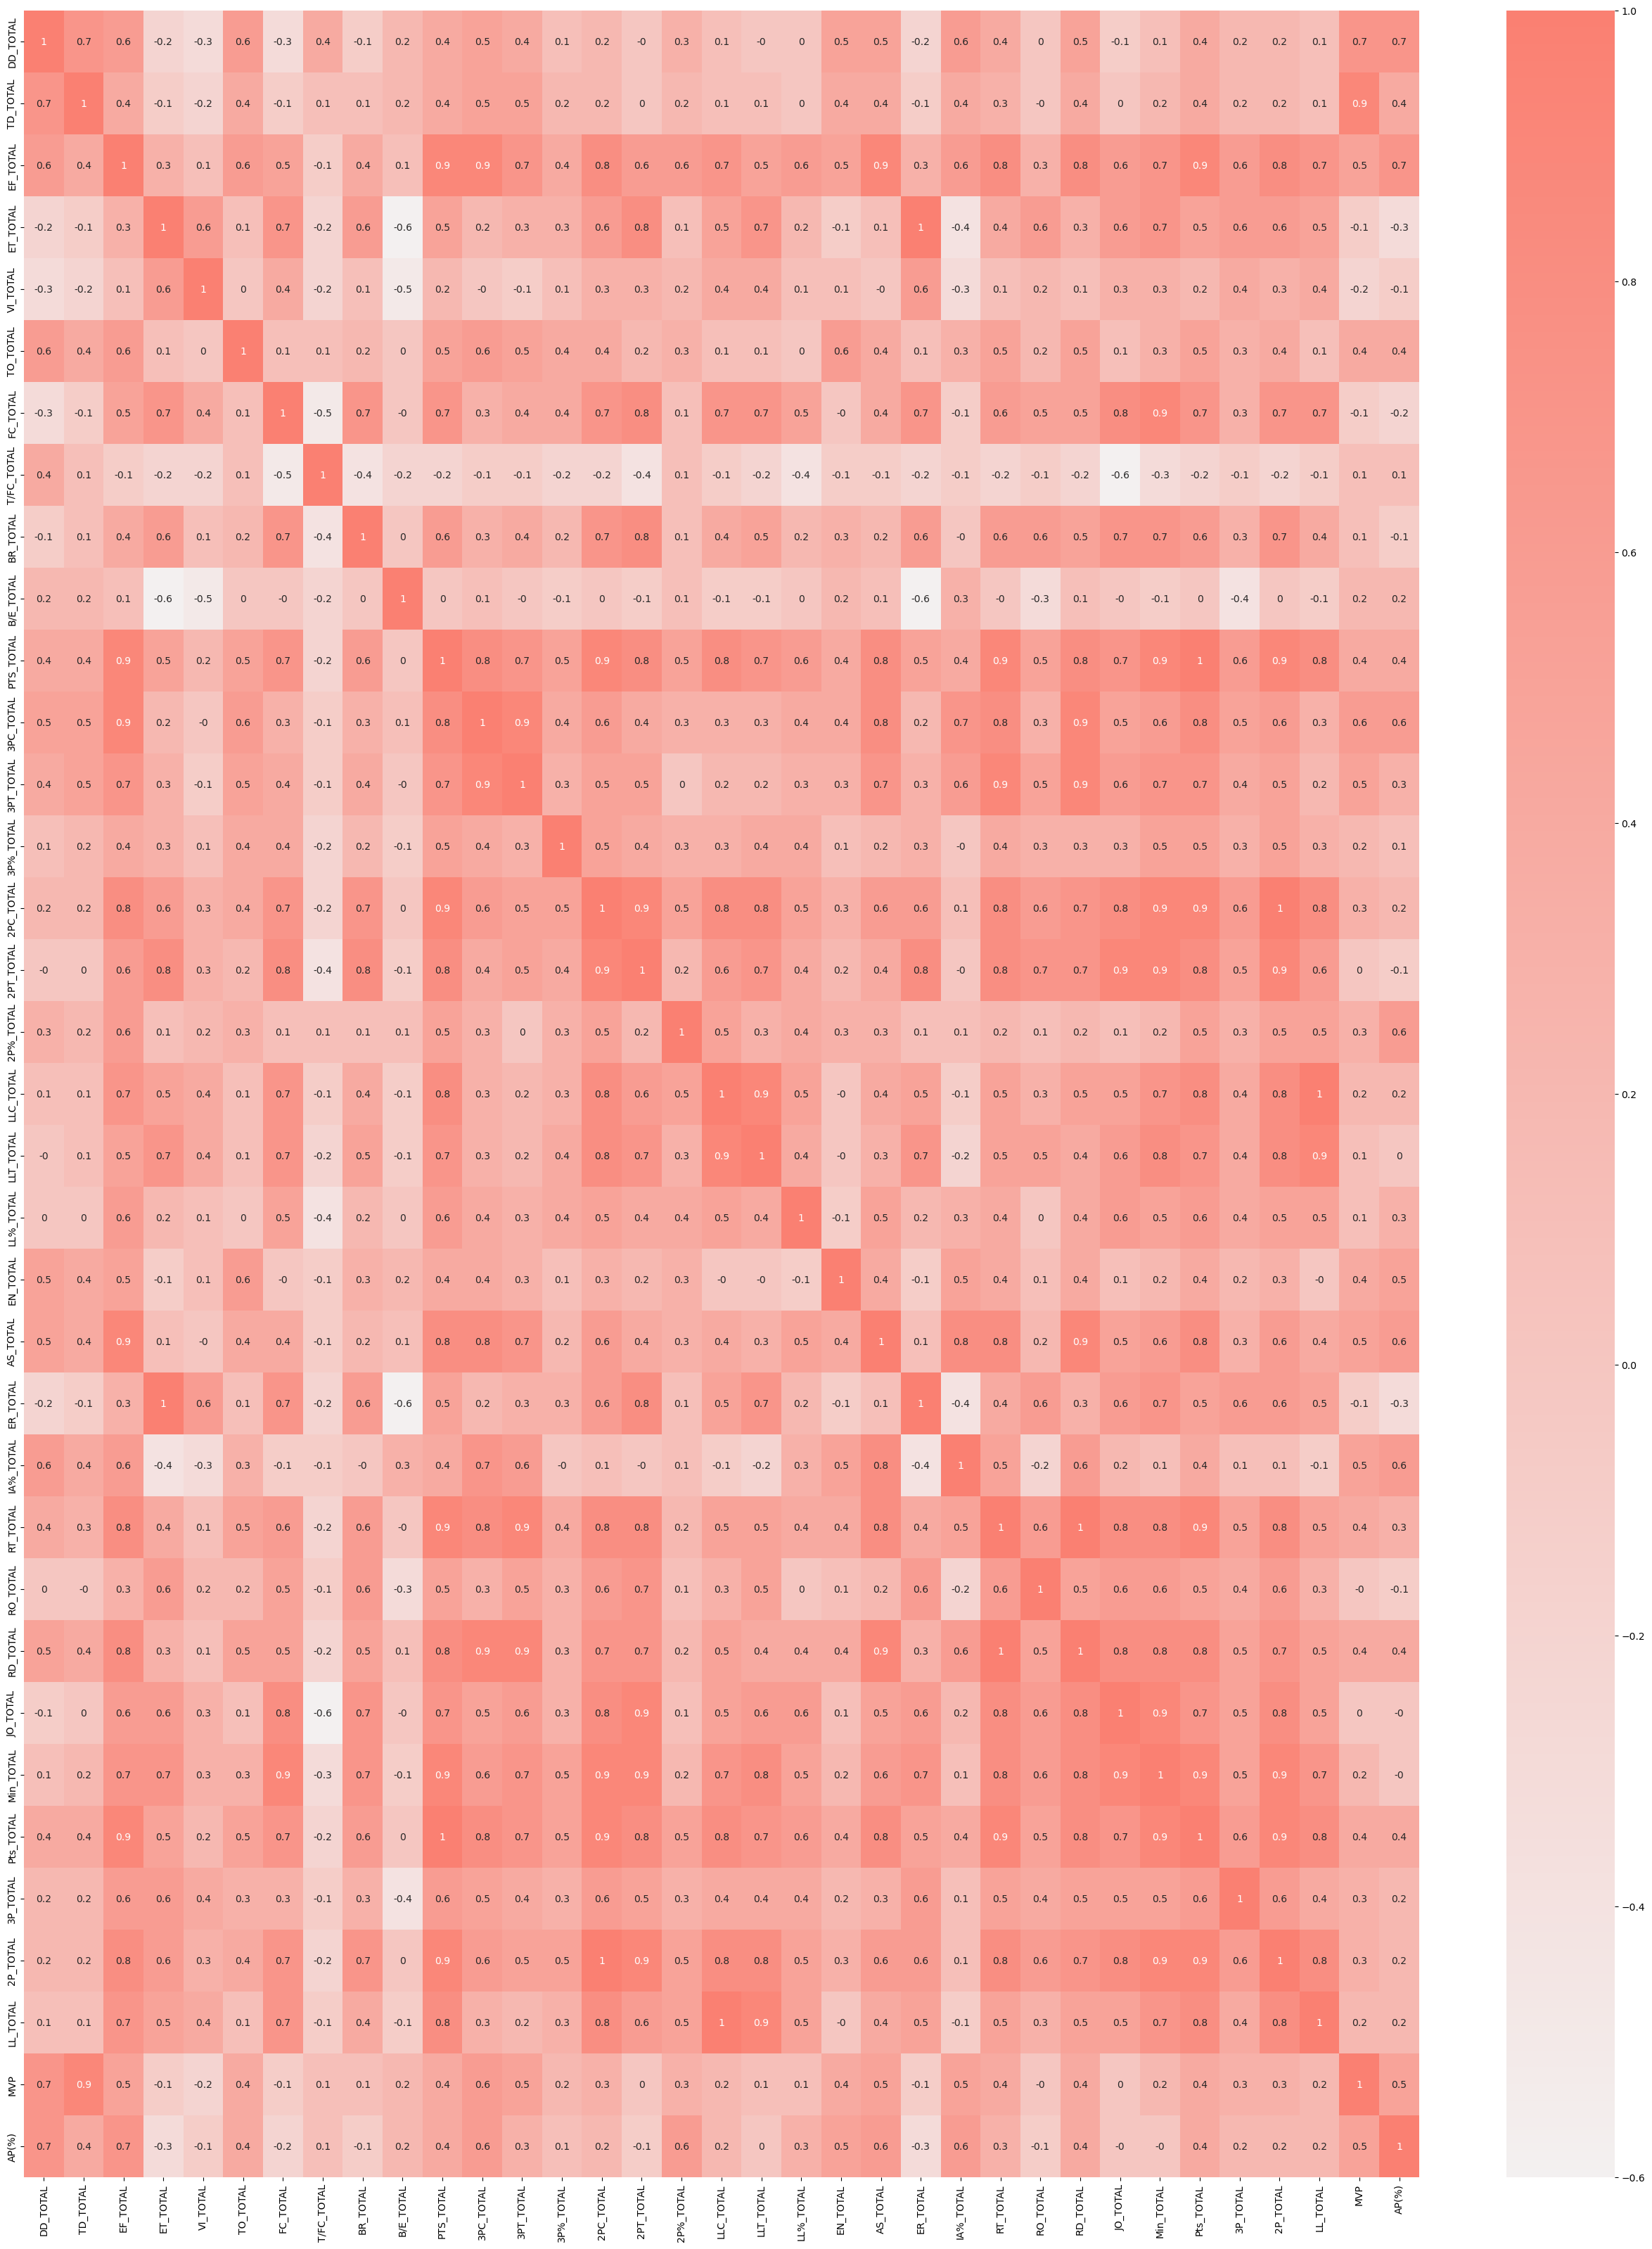

In [30]:
plt.figure(figsize=(32,40))
paleta = sns.color_palette('light:salmon', as_cmap=True)
sns.heatmap(correlation.round(1), annot=True, cmap=paleta)
plt.savefig('mapacalor.png', format='png')
plt.show()

Text(0.5, 1.0, 'Correlação entre a eficiência e os duplos-duplos')

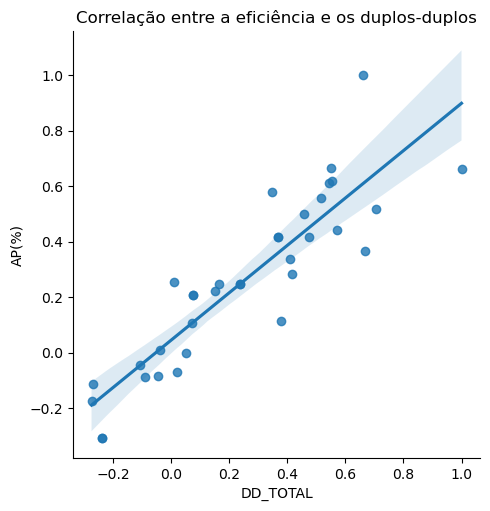

In [35]:
# aproveitamento_por_duplos = sns.lmplot(y='AP(%)', x='DD_TOTAL', data=correlation)

sns.lmplot(y='AP(%)', x='DD_TOTAL', data=correlation)
ax = plt.gca()
ax.set_title("Correlação entre a eficiência e os duplos-duplos")